In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('letterdata.csv')

In [7]:
df.shape

(20000, 17)

In [8]:
df.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [10]:
df.isnull().sum()

letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64

### Separate the input and output variables

In [9]:
x = df.drop('letter', axis=1)
y = df['letter']

<Axes: xlabel='count', ylabel='letter'>

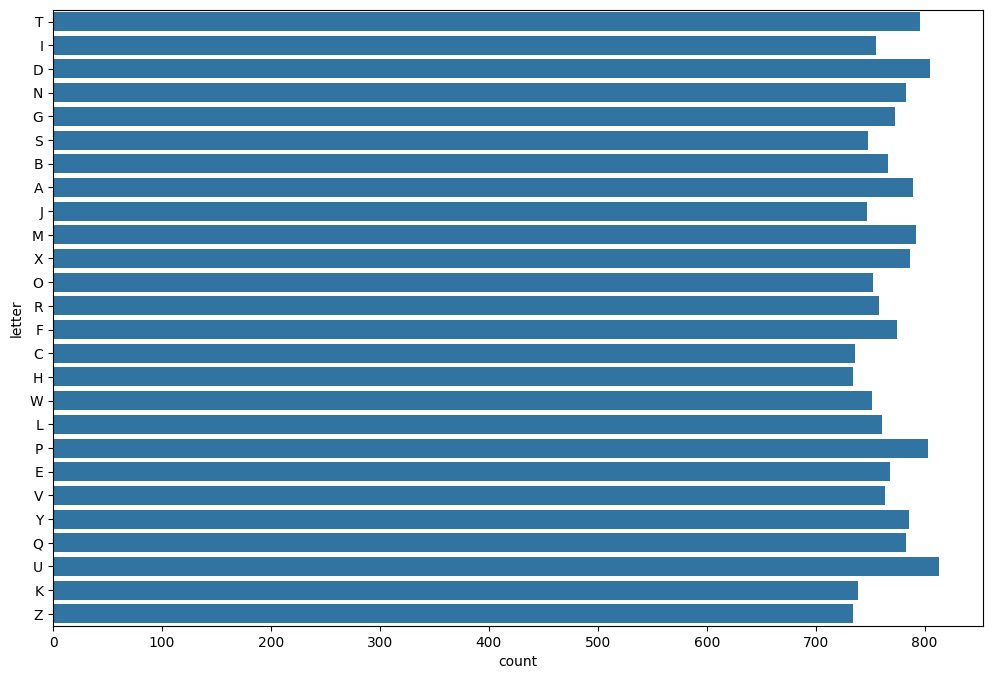

In [11]:
plt.figure(figsize=(12,8))
sns.countplot(y=y)

#### Cross-Validation

In [12]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16000, 16), (4000, 16), (16000,), (4000,))

### Build the Model

In [44]:
from sklearn.svm import SVC

svc = SVC(kernel="poly", random_state=0)

In [45]:
svc.fit(X_train, y_train)

SVC(kernel='poly', random_state=0)

Evaluate the performance

In [47]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

In [48]:
y_pred = svc.predict(X_test)

In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           A       0.99      0.99      0.99       147
           B       0.91      0.92      0.92       158
           C       0.97      0.97      0.97       156
           D       0.91      0.94      0.93       171
           E       0.95      0.95      0.95       145
           F       0.94      0.95      0.95       167
           G       0.92      0.96      0.94       182
           H       0.90      0.89      0.90       123
           I       0.97      0.94      0.96       127
           J       0.98      0.95      0.96       159
           K       0.96      0.94      0.95       143
           L       0.99      0.95      0.97       159
           M       0.99      0.96      0.97       173
           N       0.96      0.99      0.97       134
           O       0.93      0.93      0.93       142
           P       0.97      0.93      0.95       165
           Q       0.99      0.95      0.97       145
           R       0.88    

In [50]:
accuracy_score(y_test, y_pred)

0.95425

##### RBF Kernel: 0.9335
##### Poly Kernel: 0.95425
##### Linear Kernel: 0.8655
##### Sigmoid Kernel: 0.029

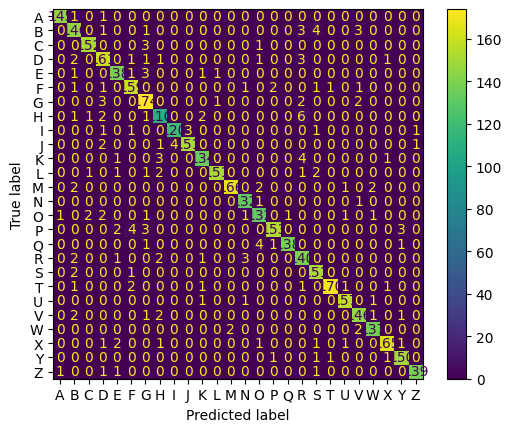

In [51]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [52]:
new = pd.DataFrame(
    [[6, 9, 9,7,6,5,6,3,5,10,9,9,8,5,2,7], [5,10,7,8,5,6,10,2,6,13,7,5,1,10,2,7]], columns=x.columns
)

In [53]:
new

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,6,9,9,7,6,5,6,3,5,10,9,9,8,5,2,7
1,5,10,7,8,5,6,10,2,6,13,7,5,1,10,2,7


In [54]:
svc.predict(new)

array(['M', 'F'], dtype=object)